In [1]:
import keras
from keras.layers import Input, Dense, Dropout
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam 

# Data Exploration

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
# prepare validation split 0.2 out of training data x_train, y_train
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


## Items Labelling

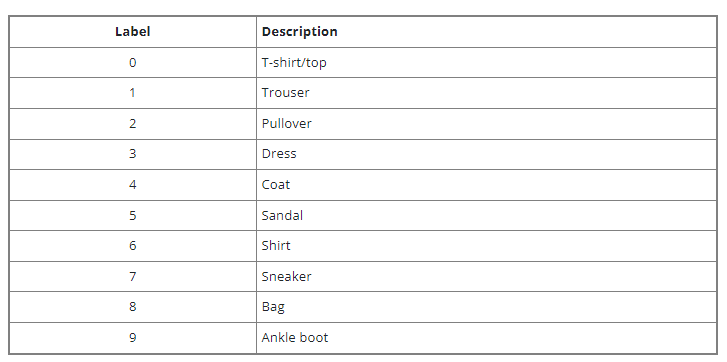

{0: 4798, 1: 4781, 2: 4795, 3: 4816, 4: 4798, 5: 4789, 6: 4782, 7: 4841, 8: 4803, 9: 4797}


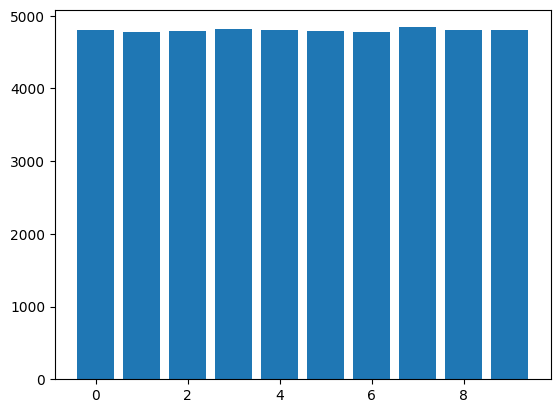

In [5]:
# Check if the data is balanced

unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))
plt.hist(y_train, bins=np.arange(11)-0.5, rwidth=0.8,)
plt.show()



 The data is very much balanced on all classes so there is no worry about the data imbalance.

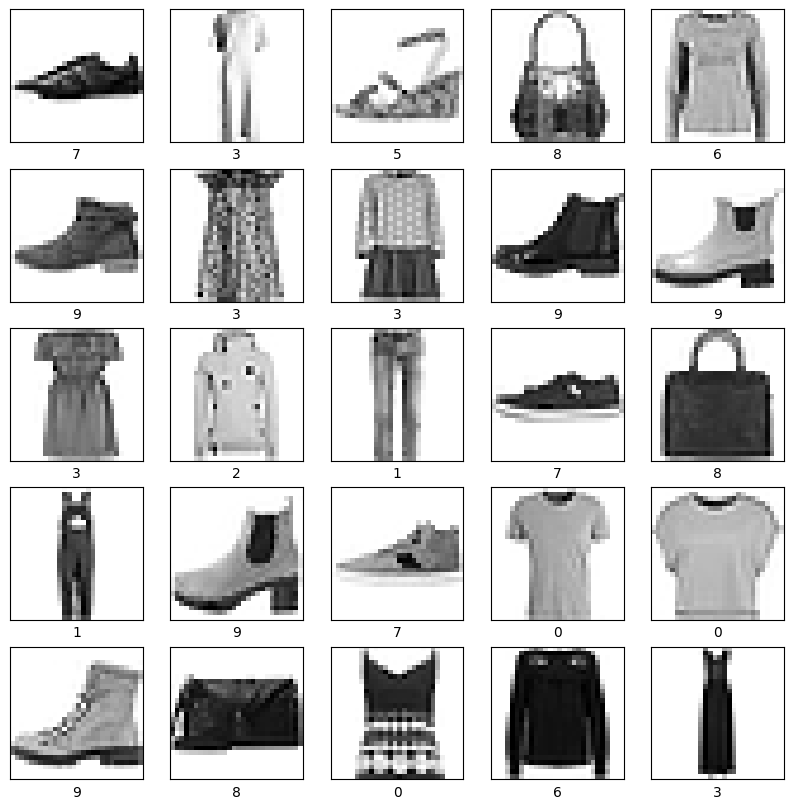

In [6]:
# view few images from the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


In [6]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [10]:
# mormalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0

# since MLP flatten the input, we need to flatten the input
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
x_val = x_val.reshape(-1, 28*28)



# Training Model
Starting with basic model architecture and random hyperparameters to get a baseline model and lets see the performance of the model and then we can improve the model by tuning the hyperparameters and model architecture.

In [11]:
network = keras.models.Sequential()
network.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(keras.layers.Dense(512, activation='relu'))
network.add(Dropout(0.2))
network.add(keras.layers.Dense(128, activation='relu'))
network.add(Dropout(0.2))
network.add(keras.layers.Dense(100, activation='relu'))
network.add(Dropout(0.2))
network.add(keras.layers.Dense(10, activation='softmax'))

network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

network.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 1.0106 - accuracy: 0.6106 - val_loss: 88.5442 - val_accuracy: 0.5807
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.6170 - accuracy: 0.7750 - val_loss: 61.3585 - val_accuracy: 0.6672
Epoch 3/20
375/375 [==============================] - 3s 8ms/step - loss: 0.5345 - accuracy: 0.8104 - val_loss: 51.9966 - val_accuracy: 0.6948
Epoch 4/20
375/375 [==============================] - 4s 9ms/step - loss: 0.4830 - accuracy: 0.8269 - val_loss: 53.4608 - val_accuracy: 0.7038
Epoch 5/20
375/375 [==============================] - 3s 8ms/step - loss: 0.4448 - accuracy: 0.8407 - val_loss: 69.1107 - val_accuracy: 0.6852
Epoch 6/20
375/375 [==============================] - 3s 9ms/step - loss: 0.4198 - accuracy: 0.8495 - val_loss: 56.1265 - val_accuracy: 0.7355
Epoch 7/20
375/375 [==============================] - 4s 10ms/step - loss: 0.4019 - accuracy: 0.8571 - val_loss: 59.5681 - val_accuracy: 0.726

## Model training History

{'loss': [1.0106115341186523, 0.6170331239700317, 0.5345023274421692, 0.4829593002796173, 0.4448234736919403, 0.4197571873664856, 0.4018816649913788, 0.38124939799308777, 0.368842214345932, 0.3548692762851715, 0.342459112405777, 0.3331276774406433, 0.3235379159450531, 0.3180798888206482, 0.30917444825172424, 0.30132171511650085, 0.29155004024505615, 0.28899624943733215, 0.2785588502883911, 0.2741507887840271], 'accuracy': [0.6106458306312561, 0.7749791741371155, 0.8104166388511658, 0.8268541693687439, 0.840708315372467, 0.8495000004768372, 0.8570833206176758, 0.8638125061988831, 0.867437481880188, 0.8728749752044678, 0.8770208358764648, 0.8812916874885559, 0.8843125104904175, 0.8841666579246521, 0.8884999752044678, 0.8911666870117188, 0.8945416808128357, 0.8963333368301392, 0.8999166488647461, 0.9012500047683716], 'val_loss': [88.54419708251953, 61.358516693115234, 51.996620178222656, 53.4608039855957, 69.11072540283203, 56.12648391723633, 59.56814956665039, 65.44021606445312, 72.65615

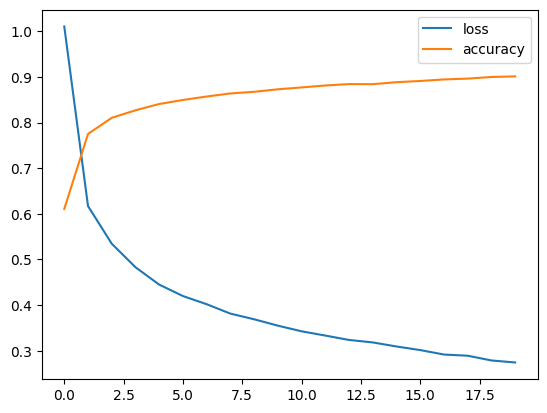

In [12]:
# plot loss and accuracy
history = network.history.history
print(history)
plt.plot(history['loss'], label='loss')
plt.plot(history['accuracy'], label='accuracy')
plt.legend()

## Test Accuracy

In [14]:
# evaluate the model
test_loss, test_acc = network.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8793
Test accuracy: 0.8792999982833862


In [15]:
# see what images are misclassified
predictions = network.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
misclassified = np.where(predicted_classes != y_test)[0]
print(misclassified)

    

313/313 [==============================] - 1s 2ms/step
[  12   23   25 ... 9977 9979 9985]


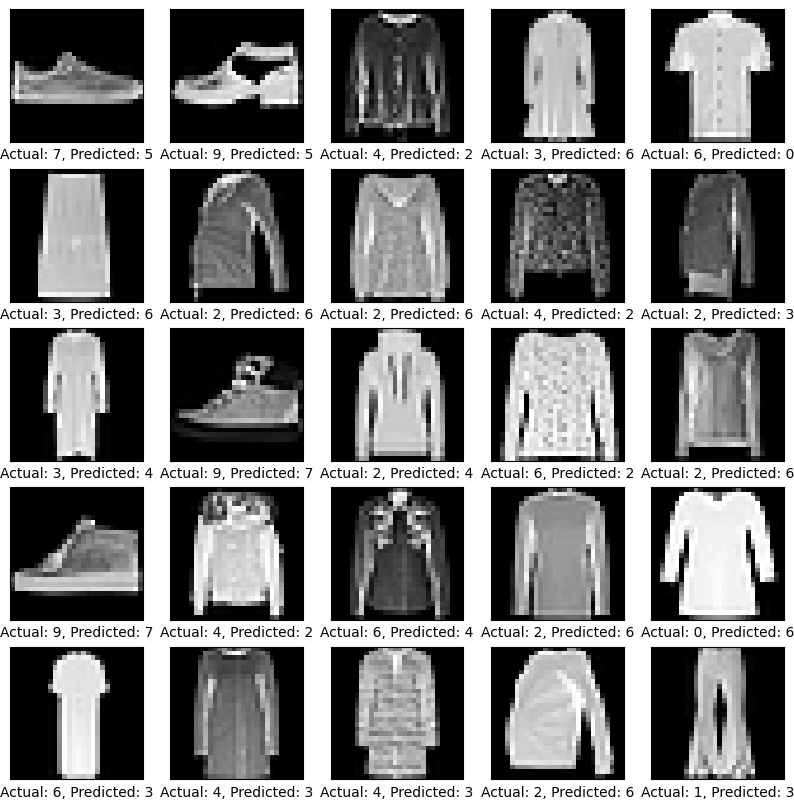

In [16]:
# plot the first 25 misclassified images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[misclassified[i]].reshape(28,28), cmap='gray')
    plt.xlabel(f'Actual: {y_test[misclassified[i]]}, Predicted: {predicted_classes[misclassified[i]]}')

<Axes: >

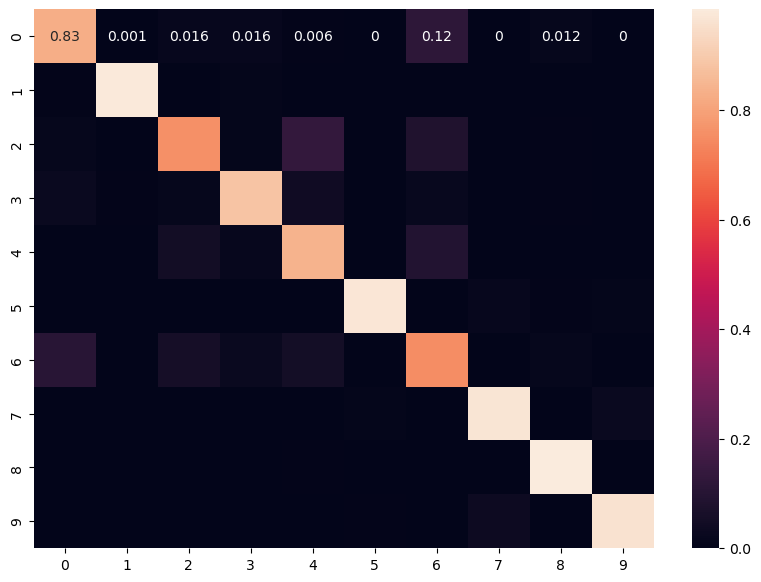

In [37]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
cm = confusion_matrix(y_test, predicted_classes)
cm = cm / cm.sum(axis=1)
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)


In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)


In [7]:
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD
from keras.regularizers import L1, L2
from keras.preprocessing.image import ImageDataGenerator

# ... (Your data loading and preprocessing code)

# Define a wider range of hidden layer sizes to explore
hidden_layer_sizes = [512, 1024]

# Create a loop to try different architectures and hyperparameters
for hidden_size in hidden_layer_sizes:
    # Create a new MLP model with the current hidden size
    network = keras.models.Sequential()
    network.add(keras.layers.Flatten(input_shape=(28, 28, 1))) 
    network.add(keras.layers.Dense(hidden_size, activation='relu', input_shape=(28*28,)))
    network.add(Dropout(0.2))  # Add dropout for regularization
    network.add(keras.layers.Dense(hidden_size, activation='relu'))
    network.add(Dropout(0.2))
    network.add(keras.layers.Dense(10, activation='softmax'))

    #可以选择不同的优化器例如SGD
    # opt = SGD(learning_rate=0.01, momentum=0.9)
    
    # Or L1/L2 regularization with Adam
    network.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy']
                    )

    # Use data augmentation with ImageDataGenerator
    datagen = ImageDataGenerator(  
        rotation_range=10,  # Rotate images up to 10 degrees  
        width_shift_range=0.1,  # Shift images horizontally up to 10% of the width  
        height_shift_range=0.1,  # Shift images vertically up to 10% of the height  
        zoom_range=0.1,  # Zoom in on images up to 10%  
        fill_mode='nearest'  # Fill in missing pixels with the nearest filled value  
    )
    datagen.fit(x_train)

    # print the shape of the data
    print(x_train.shape)
    print(y_train.shape)
    print(x_test.shape)
    print(y_test.shape)

    # Train the model with early stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
    network.fit(datagen.flow(x_train, y_train, batch_size=128),
                epochs=20,
                validation_data=(x_test, y_test),
                callbacks=[early_stopping])

    # Evaluate and analyze misclassified images
    test_loss, test_acc = network.evaluate(x_test, y_test)
    print(f'Test accuracy with hidden size {hidden_size}: {test_acc}')
    # ... (Analyze misclassified images as before)


(60000, 28, 28, 1)
(60000, 1)
(10000, 28, 28, 1)
(10000, 1)
Epoch 1/20
469/469 [==============================] - 13s 26ms/step - loss: 4.8916 - accuracy: 0.0776 - val_loss: 0.9960 - val_accuracy: 0.1021
Epoch 2/20
469/469 [==============================] - 12s 26ms/step - loss: 1.3007 - accuracy: 0.0703 - val_loss: 0.9147 - val_accuracy: 0.0866
Epoch 3/20
469/469 [==============================] - 13s 27ms/step - loss: 1.1391 - accuracy: 0.0752 - val_loss: 0.8470 - val_accuracy: 0.1041
Epoch 4/20
469/469 [==============================] - 12s 26ms/step - loss: 1.0127 - accuracy: 0.0798 - val_loss: 0.7768 - val_accuracy: 0.1046
Epoch 5/20
469/469 [==============================] - 13s 27ms/step - loss: 0.9316 - accuracy: 0.0962 - val_loss: 0.7111 - val_accuracy: 0.1402
Epoch 6/20
469/469 [==============================] - 12s 26ms/step - loss: 0.9080 - accuracy: 0.1088 - val_loss: 0.6908 - val_accuracy: 0.1151
Epoch 7/20
469/469 [==============================] - 13s 27ms/step - loss: 

## The current model setup and results look quite good. The training accuracy is over 93% and your test accuracy is close to 90%, which the 85% threshold mentioned in the assignment. However, We can still experiment with a few things to possibly improve your model's performance:
- Learning Rate: You are currently using the Adam optimizer with its default learning rate of 0.001. You can try changing the learning rate to see if it affects your model's performance. However, be careful not to set the learning rate too high as it might cause the model to diverge, or too low as it might cause the model to learn too slowly.
- Batch Size: You are currently using a batch size of 128. You can try using a smaller or larger batch size. A smaller batch size might lead to slower training but could result in a better generalization. A larger batch size might lead to faster training but could result in a poorer generalization.
- Epochs: You are currently training your model for 20 epochs. You can try training your model for more epochs. However, be careful not to train for too many epochs as it might lead to overfitting.
- Dropout: You are currently using a dropout rate of 0.2. Dropout is a regularization technique that can help prevent overfitting. You can try using a higher dropout rate. However, be careful not to set the dropout rate too high as it might lead to underfitting.
- Additional Hidden Layers: You can try adding more hidden layers to your model. This could potentially increase the model's capacity to learn complex patterns in the data. However, be careful not to make your model too complex as it might lead to overfitting.
- Different Activation Functions: You are currently using the ReLU activation function in your hidden layers and the softmax activation function in your output layer. You can try using different activation functions to see if they improve your model's performance. However, the ReLU activation function is a good default choice for the hidden layers and the softmax activation function is a good choice for the output layer in a multiclass classification problem.


# Experiment 1: Learning Rate

Lets starts with 100 epochs and 128 batch-size default to experiment on varying learning rate. 
- We will try learning rate of 0.01, 0.001, 0.0001 and 0.00001.
- We will keep the model architecture same as the baseline model.




In [40]:
# define learning rates  
learning_rates = [0.01, 0.001, 0.0001]  
  
# store history for each learning rate  
histories = []  
test_accuracies = []
test_losses = []
  
for lr in learning_rates:
    print(f'Learning rate: {lr}')
    # instantiate the optimizer  
    opt = Adam(learning_rate=lr)  
  
    # define the model  
    network = keras.models.Sequential()  
    network.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))  
    network.add(keras.layers.Dense(512, activation='relu'))  
    network.add(Dropout(0.2))  
    network.add(keras.layers.Dense(128, activation='relu'))  
    network.add(Dropout(0.2))  
    network.add(keras.layers.Dense(100, activation='relu'))  
    network.add(Dropout(0.2))
    network.add(keras.layers.Dense(10, activation='softmax'))  
  
    # compile the model  
    network.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])  
  
    # train the model  
    history = network.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_val, y_val))

    # evaluate the model
    test_loss, test_acc = network.evaluate(x_test, y_test)
    test_accuracies.append(test_acc)
    test_losses.append(test_loss)
    print('Test accuracy:', test_acc)

    # store the history  
    histories.append(history)  
  


Learning rate: 0.01
Epoch 1/100
375/375 [==============================] - 3s 7ms/step - loss: 0.8274 - accuracy: 0.6781 - val_loss: 164.2652 - val_accuracy: 0.5940
Epoch 2/100
375/375 [==============================] - 2s 7ms/step - loss: 0.5342 - accuracy: 0.8076 - val_loss: 122.9279 - val_accuracy: 0.6809
Epoch 3/100
375/375 [==============================] - 2s 7ms/step - loss: 0.4749 - accuracy: 0.8320 - val_loss: 118.3727 - val_accuracy: 0.6969
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 0.4450 - accuracy: 0.8417 - val_loss: 111.4573 - val_accuracy: 0.7051
Epoch 5/100
375/375 [==============================] - 3s 7ms/step - loss: 0.4231 - accuracy: 0.8501 - val_loss: 68.0254 - val_accuracy: 0.7729
Epoch 6/100
375/375 [==============================] - 3s 9ms/step - loss: 0.4134 - accuracy: 0.8544 - val_loss: 91.0441 - val_accuracy: 0.7435
Epoch 7/100
375/375 [==============================] - 3s 8ms/step - loss: 0.3999 - accuracy: 0.8586 - val_loss:

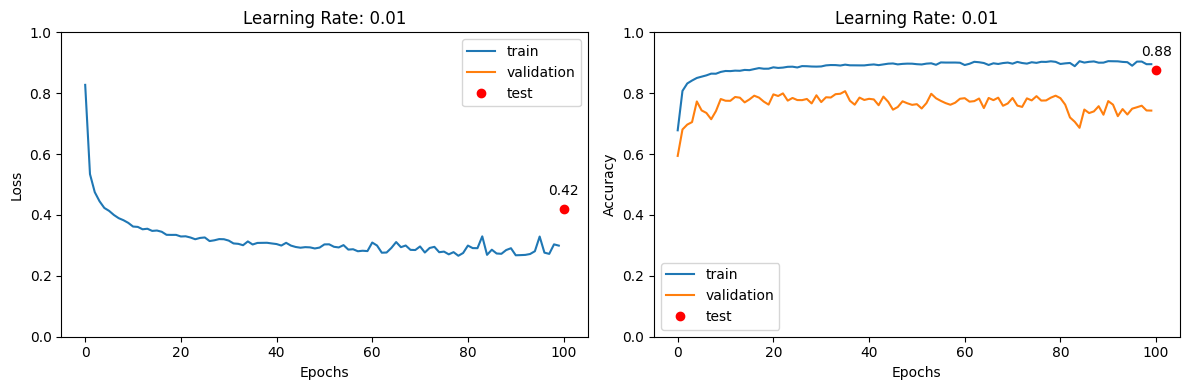

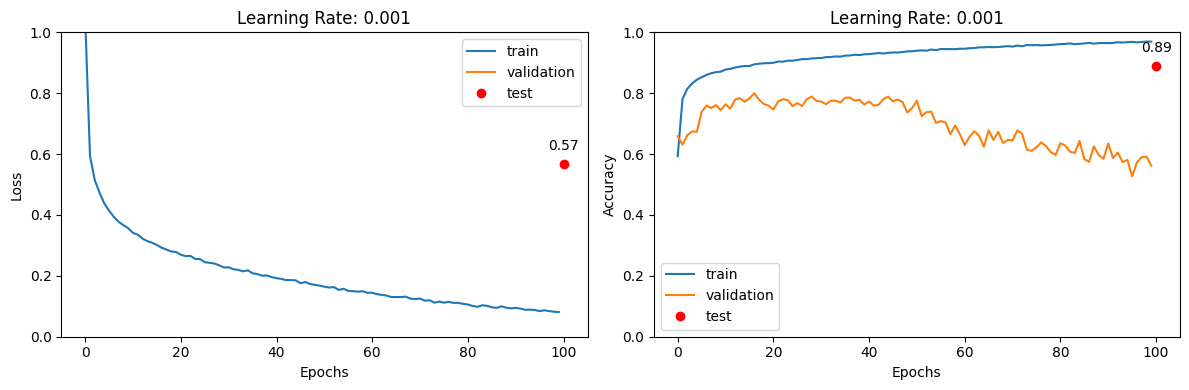

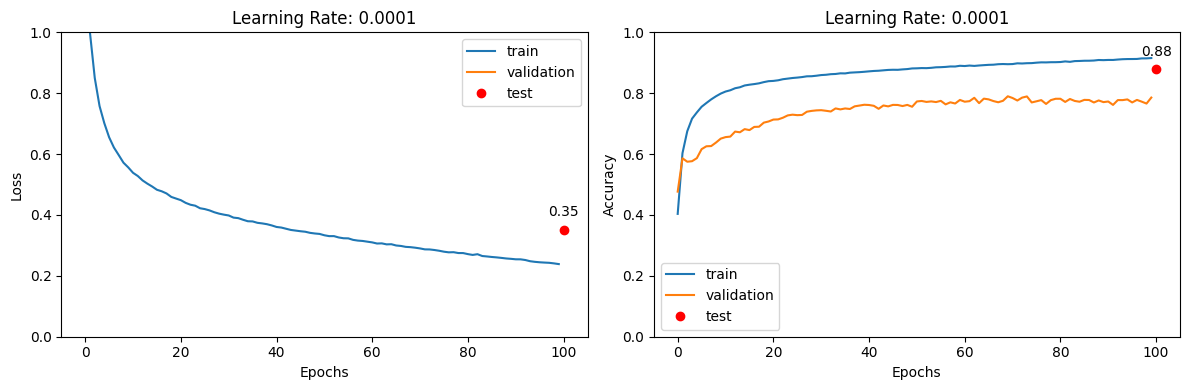

[1.6646642684936523,
 0.9984495639801025,
 0.8499947190284729,
 0.7578287720680237,
 0.7013645172119141,
 0.6552864909172058,
 0.6216710805892944,
 0.5969494581222534,
 0.5717576742172241,
 0.5562322735786438,
 0.538514256477356,
 0.5279261469841003,
 0.5134109854698181,
 0.5028536319732666,
 0.49344509840011597,
 0.4827520251274109,
 0.47775647044181824,
 0.47068217396736145,
 0.4592834413051605,
 0.4538722038269043,
 0.4485900104045868,
 0.4397735595703125,
 0.4336751699447632,
 0.4304581582546234,
 0.4220997393131256,
 0.4193088114261627,
 0.4149172902107239,
 0.4088617265224457,
 0.40428897738456726,
 0.4010145366191864,
 0.39835262298583984,
 0.39131686091423035,
 0.3895987570285797,
 0.3841952681541443,
 0.37938475608825684,
 0.37877872586250305,
 0.3742228150367737,
 0.3722701966762543,
 0.36964017152786255,
 0.36561083793640137,
 0.3605780303478241,
 0.35863834619522095,
 0.35467931628227234,
 0.3507556915283203,
 0.34866154193878174,
 0.3465450704097748,
 0.34490087628364563,


In [49]:
# plot loss and accuracy for each batch size  
for i, history in enumerate(histories):  
    plt.figure(figsize=(12, 4))  
      
    plt.subplot(1, 2, 1)  
    plt.plot(history.history['loss'], label='train')  
    plt.plot(history.history['val_loss'], label='validation')  
    # mark point for test loss and annotate
    plt.plot(100, test_losses[i], 'ro', label='test')
    # annotate the point
    plt.annotate(f'{test_losses[i]:.2f}', (100, test_losses[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title('Learning Rate: ' + str(learning_rates[i])) 
    plt.xlabel('Epochs')  
    plt.ylabel('Loss')  
    plt.ylim(0, 1)  # Set the same y-axis limits for all subplots
    plt.legend()  
  
    plt.subplot(1, 2, 2)  
    plt.plot(history.history['accuracy'], label='train')  
    plt.plot(history.history['val_accuracy'], label='validation')  
    # mark point for test accuracy
    plt.plot(100, test_accuracies[i], 'ro', label='test')
    # annotate the point
    plt.annotate(f'{test_accuracies[i]:.2f}', (100, test_accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title('Learning Rate: ' + str(learning_rates[i]))
    plt.xlabel('Epochs')  
    plt.ylabel('Accuracy')  
    plt.ylim(0, 1)  # Set the same y-axis limits for all subplots
    plt.legend() 
  
    plt.tight_layout()  
    plt.show()



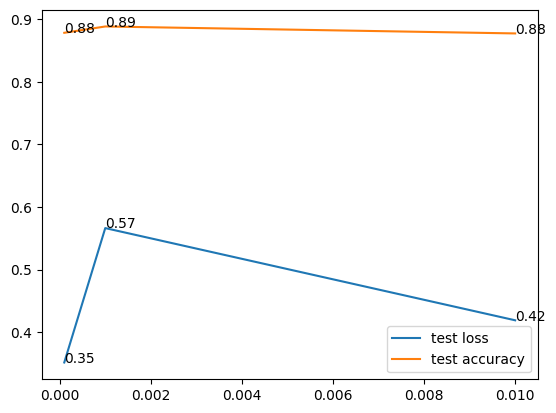

In [42]:
# plot test_losses and test_accuracies lists plot
plt.plot(learning_rates, test_losses, label='test loss')
plt.plot(learning_rates, test_accuracies, label='test accuracy')
# mark points 
for i, txt in enumerate(test_losses):
    plt.annotate(f'{round(txt, 2)}', (learning_rates[i], test_losses[i]))
for i, txt in enumerate(test_accuracies):
    plt.annotate(f'{round(txt, 2)}', (learning_rates[i], test_accuracies[i]))
plt.legend()

## From the above results, the best learning rate is 0.0001 in terms of stability and accuracy.

- Learning Rate: 0.01
     - 0.84
     - The loss was decreasing gradually and close to the validation loss.
     - The accuracies were stable and close to each other.
     - However, the model is still not converging (low accuracy).

- Learning Rate: 0.001
     - 0.89
     - But the 
     - The train loss decreased gradually but was not close to the validation loss.
     - The accuracies were very high, but as epochs increased, the model started to overfit.

- Learning Rate: 0.0001
     - 0.88
     - The train loss was decreasing gradually and close to the validation loss.
     - The accuracies were stable and close to each other.
     - The model is not overfitting and the accuracy is also high.

- Therefore, for 20 epochs, the best learning rate is 0.0001 in terms of stability and accuracy.

# Experiment 2: Batch Size
using different batch sizes like 32, 64, 128, 256, and 512.


Batch size: 32
Epoch 1/20
1500/1500 [==============================] - 10s 6ms/step - loss: 1.4836 - accuracy: 0.4056 - val_loss: 63.0912 - val_accuracy: 0.5436
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.9106 - accuracy: 0.6415 - val_loss: 65.8552 - val_accuracy: 0.5996
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.7619 - accuracy: 0.7131 - val_loss: 67.6103 - val_accuracy: 0.6296
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6777 - accuracy: 0.7485 - val_loss: 70.4933 - val_accuracy: 0.6450
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6394 - accuracy: 0.7674 - val_loss: 63.9190 - val_accuracy: 0.6708
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6040 - accuracy: 0.7843 - val_loss: 61.9366 - val_accuracy: 0.6847
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5760 - accuracy: 0.7963 - val_loss:

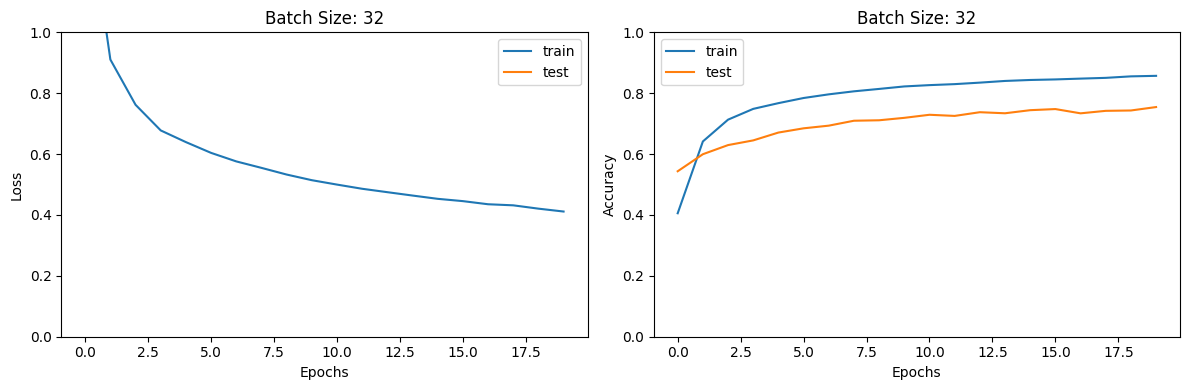

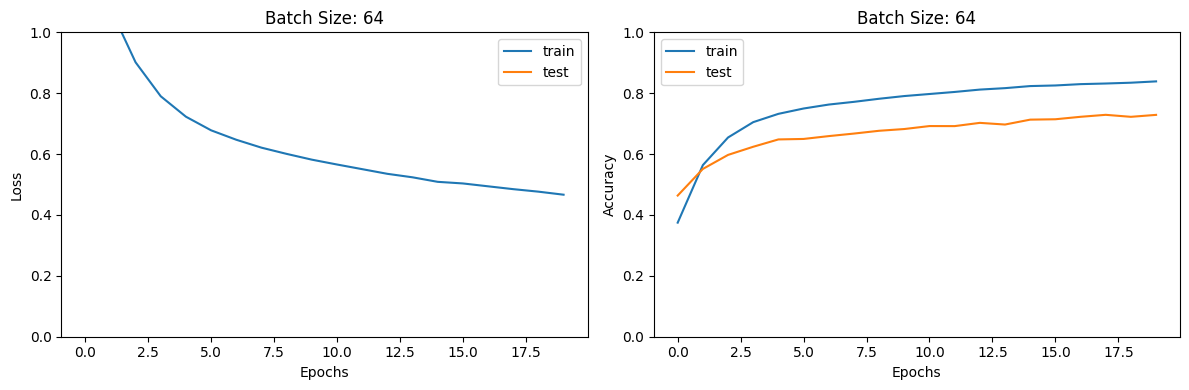

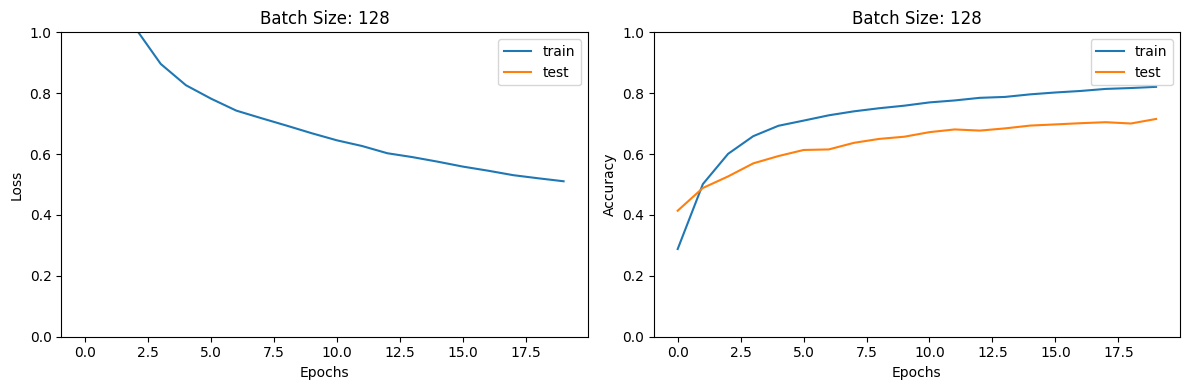

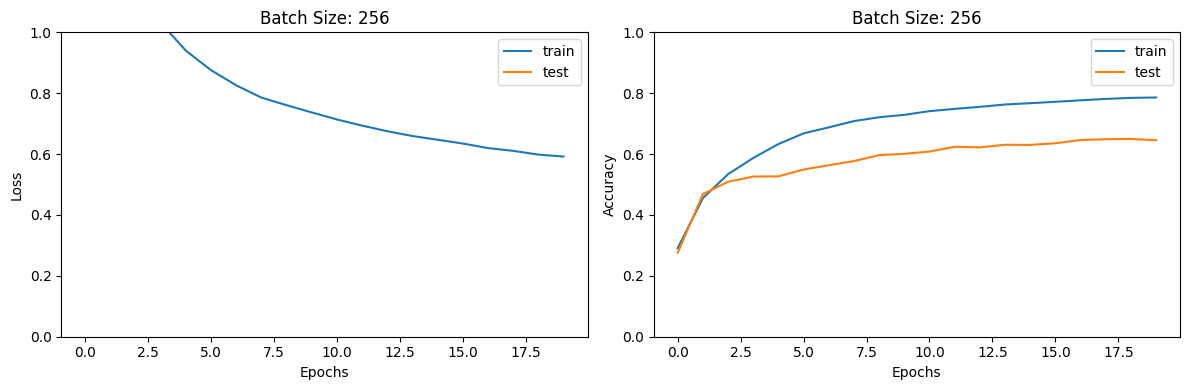

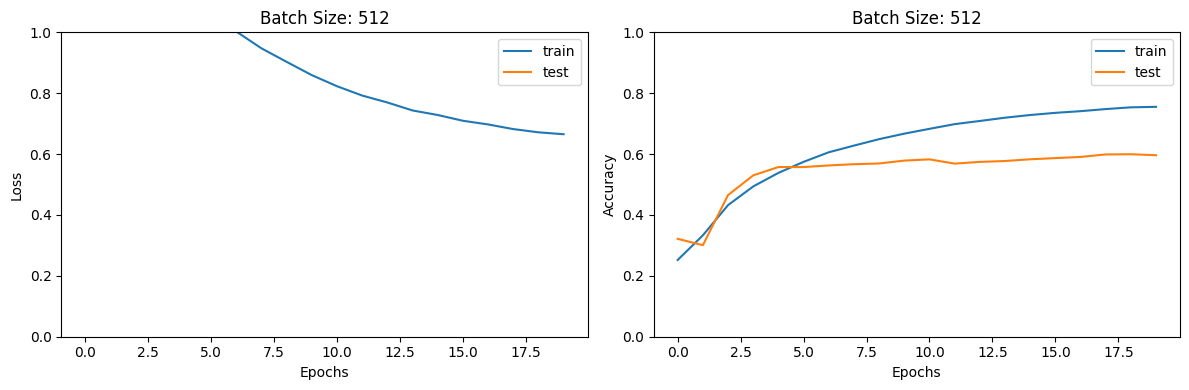

In [22]:
# define batch sizes  
batch_sizes = [32, 64, 128, 256, 512]  
  
# store history for each batch size  
histories = []  
test_accuracies = []
test_losses = []
  
# specify learning rate (best from previous experiment)  
learning_rate = 0.0001  
  
  
for bs in batch_sizes:
    print(f'Batch size: {bs}')
    # Create Opt here because we need to reset for each batch size
    opt = Adam(learning_rate=learning_rate)

    # define the model  
    network = keras.models.Sequential()  
    network.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))  
    network.add(keras.layers.Dense(512, activation='relu'))  
    network.add(Dropout(0.4))  
    network.add(keras.layers.Dense(128, activation='relu'))  
    network.add(Dropout(0.4)) 
    network.add(keras.layers.Dense(100, activation='relu'))  
    network.add(Dropout(0.4))
    network.add(keras.layers.Dense(10, activation='softmax'))  
  
    # compile the model  
    network.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])  
  
    # train the model  
    history = network.fit(x_train, y_train, epochs=20, batch_size=bs, validation_data=(x_val, y_val))  

    # evaluate the model
    test_loss, test_acc = network.evaluate(x_test, y_test)
    test_accuracies.append(test_acc)
    test_losses.append(test_loss)
    print('Test accuracy:', test_acc)
  
    # store the history  
    histories.append(history)  
  


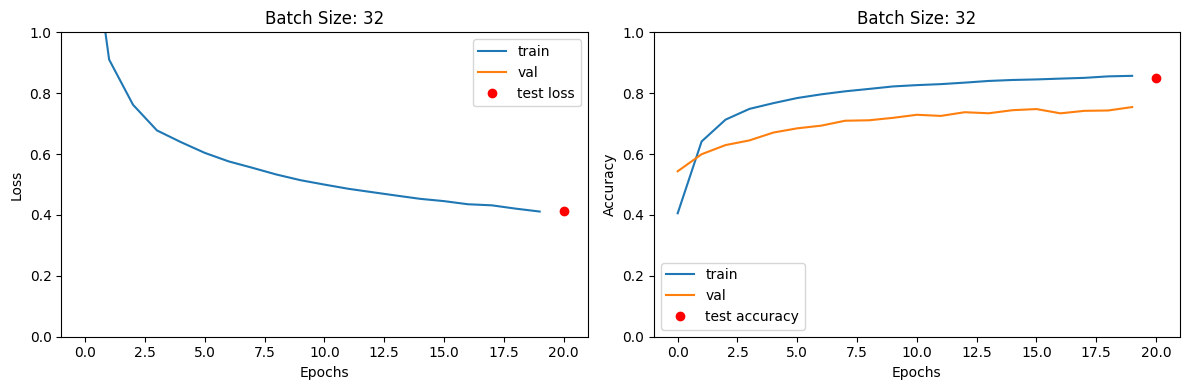

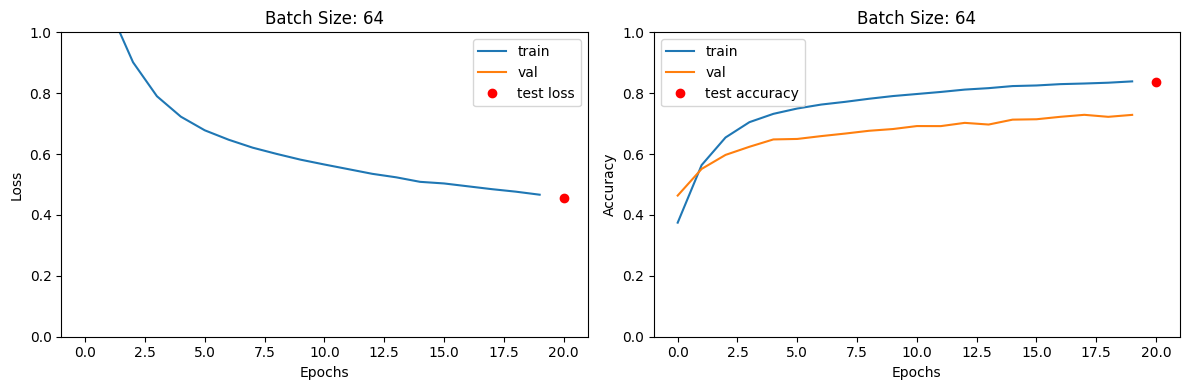

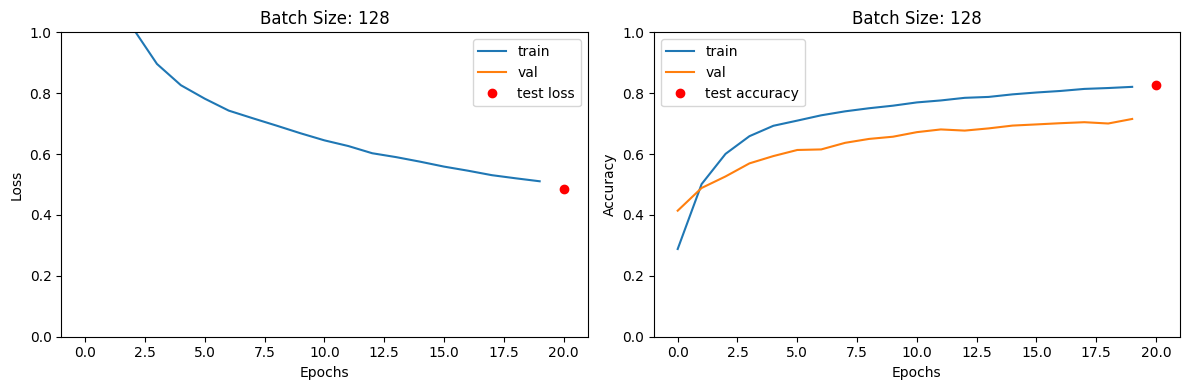

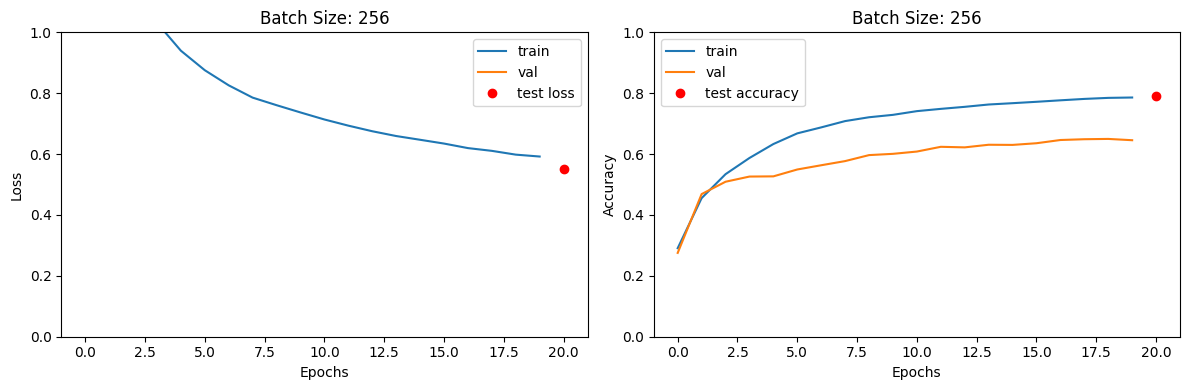

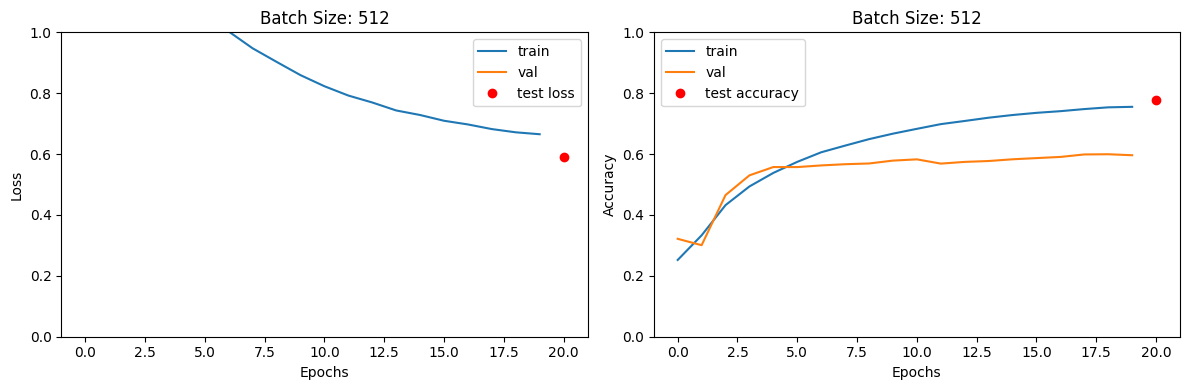

In [29]:
# plot loss and accuracy for each batch size  
for i, history in enumerate(histories):  
    plt.figure(figsize=(12, 4))  
      
    plt.subplot(1, 2, 1)  
    plt.plot(history.history['loss'], label='train')  
    plt.plot(history.history['val_loss'], label='val')  
    # mark point for test loss
    plt.plot(20, test_losses[i], 'ro', label='test loss')
    plt.title('Batch Size: ' + str(batch_sizes[i]))  
    plt.xlabel('Epochs')  
    plt.ylabel('Loss')  
    plt.ylim(0, 1)  # Set the same y-axis limits for all subplots
    plt.legend()  
  
    plt.subplot(1, 2, 2)  
    plt.plot(history.history['accuracy'], label='train')  
    plt.plot(history.history['val_accuracy'], label='val')  
    # mark point for test accuracy
    plt.plot(20, test_accuracies[i], 'ro', label='test accuracy')
    plt.title('Batch Size: ' + str(batch_sizes[i]))  
    plt.xlabel('Epochs')  
    plt.ylabel('Accuracy')  
    plt.ylim(0, 1)  # Set the same y-axis limits for all subplots
    plt.legend() 
  
    plt.tight_layout()  
    plt.show()


# from the above results, 
- Batch size: 32
    - The model accuracy is very high on training but the validation accuracy is low. But validation accuracy is still highest among all batch sizes.
    - The model is overfitting.

- Batch size: 64
    - The model accuracy just lower than the batch size 32
    - The model is overfitting. but less than batch size 32

- Batch size: 128
    - The model accuracy is little lower than the batch size 64
    - The model is overfitting. but less than batch size 64

- Batch size: 256
    - The model accuracy is little lower than the batch size 128
    - The model is overfitting. but less than batch size 128

- Batch size: 512
    - The model accuracy is lowest among all batch sizes
    - But the model is fitting well with minimal overfitting.

The difference in accuracy between the training and validation sets is gradually decreasing as the batch size increases. Therefore, the best batch size is 512 in terms of stability and accuracy.

The best batch size is 512 in terms of stability(less overfitting)
The best batch size is 32 in terms of accuracy.
The best batch size is 256 in terms of stability and accuracy.

# Experiment 3: Epochs

In [30]:
# Define epochs
epochs = [20, 40, 60, 80, 100]

# store history for each epoch
histories = []
test_accuracies = []
test_losses = []

# specify learning rate (best from previous experiment)
learning_rate = 0.0001
batch_size = 256

for e in epochs:
    print(f'Epochs: {e}')
    # Create Opt here because we need to reset for each batch size
    opt = Adam(learning_rate=learning_rate)

    # define the model
    network = keras.models.Sequential()
    network.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
    network.add(keras.layers.Dense(512, activation='relu'))
    network.add(Dropout(0.4))
    network.add(keras.layers.Dense(128, activation='relu'))
    network.add(Dropout(0.4))
    network.add(keras.layers.Dense(100, activation='relu'))
    network.add(Dropout(0.4))
    network.add(keras.layers.Dense(10, activation='softmax'))

    # compile the model
    network.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # train the model
    history = network.fit(x_train, y_train, epochs=e, batch_size=batch_size, validation_data=(x_test, y_test))

    # evaluate the model
    test_loss, test_acc = network.evaluate(x_test, y_test)
    test_accuracies.append(test_acc)
    test_losses.append(test_loss)
    print('Test accuracy:', test_acc)

    # store the history
    histories.append(history)


Epochs: 20
Epoch 1/20
188/188 [==============================] - 3s 11ms/step - loss: 2.0794 - accuracy: 0.2482 - val_loss: 1.5146 - val_accuracy: 0.3858
Epoch 2/20
188/188 [==============================] - 2s 10ms/step - loss: 1.4332 - accuracy: 0.3965 - val_loss: 1.1167 - val_accuracy: 0.5608
Epoch 3/20
188/188 [==============================] - 2s 12ms/step - loss: 1.1976 - accuracy: 0.5042 - val_loss: 0.9501 - val_accuracy: 0.6619
Epoch 4/20
188/188 [==============================] - 3s 14ms/step - loss: 1.0615 - accuracy: 0.5735 - val_loss: 0.8573 - val_accuracy: 0.6958
Epoch 5/20
188/188 [==============================] - 3s 15ms/step - loss: 0.9670 - accuracy: 0.6218 - val_loss: 0.7875 - val_accuracy: 0.7205
Epoch 6/20
188/188 [==============================] - 2s 12ms/step - loss: 0.8933 - accuracy: 0.6575 - val_loss: 0.7411 - val_accuracy: 0.7356
Epoch 7/20
188/188 [==============================] - 3s 15ms/step - loss: 0.8440 - accuracy: 0.6783 - val_loss: 0.7055 - val_accur

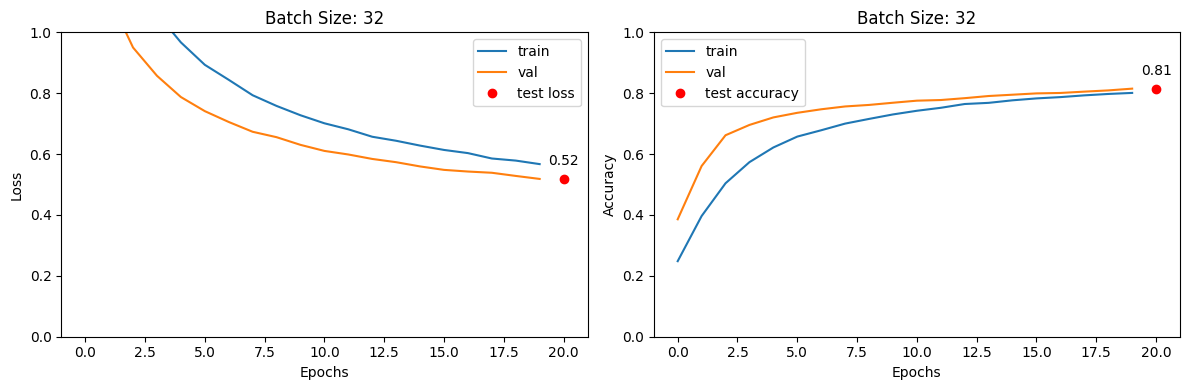

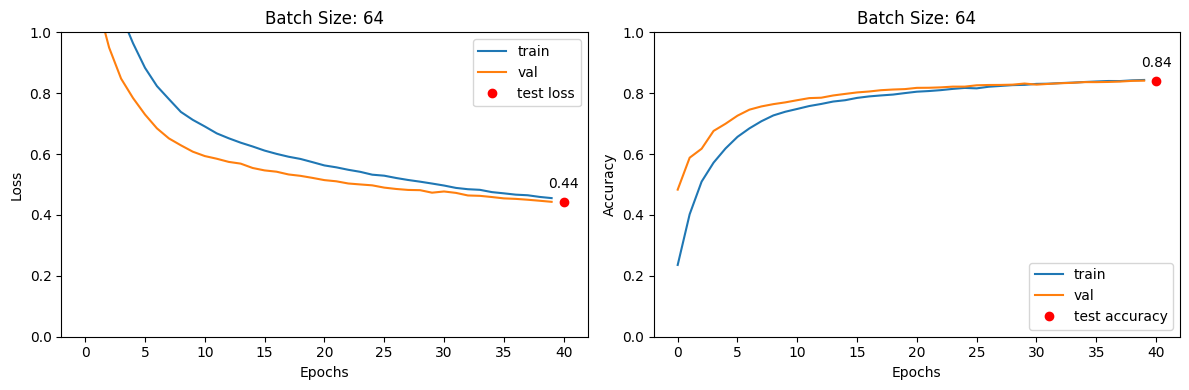

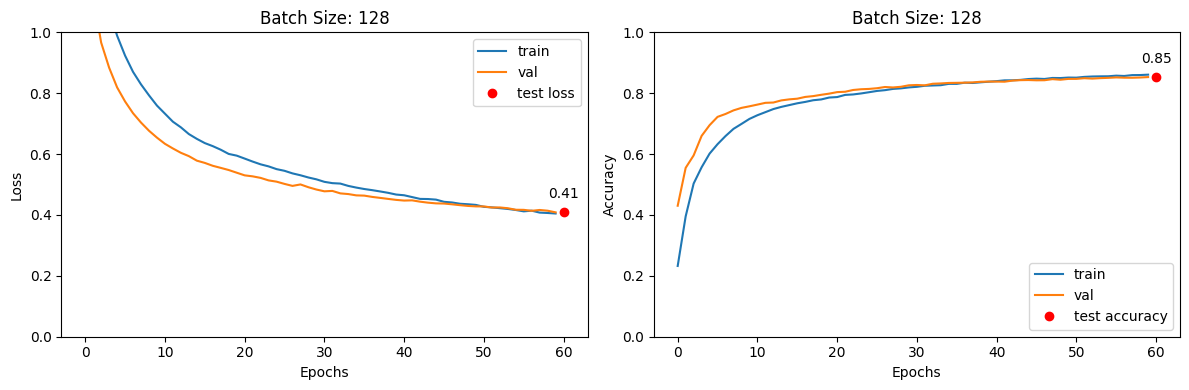

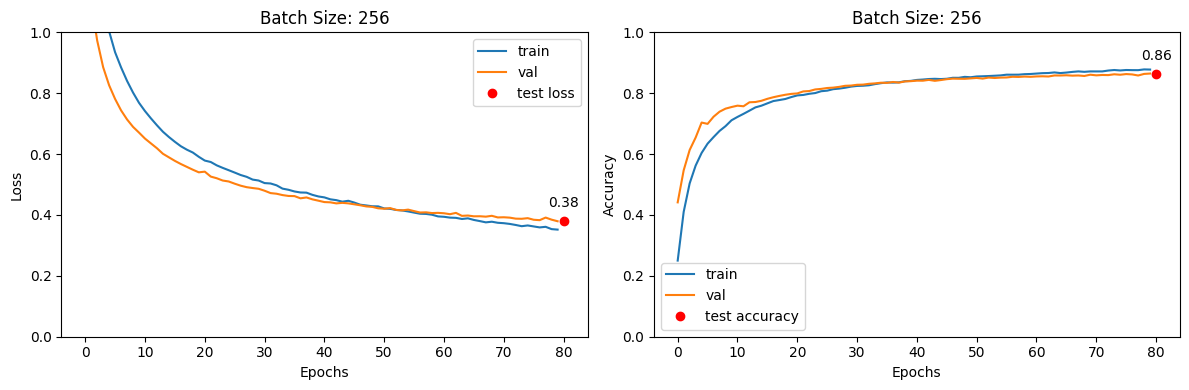

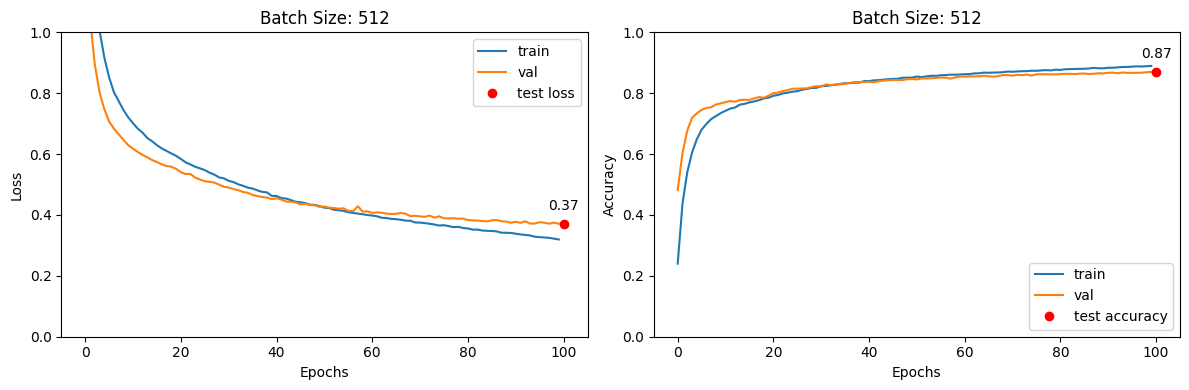

In [39]:
# plot loss and accuracy for each batch size  
for i, history in enumerate(histories):  
    plt.figure(figsize=(12, 4))  
      
    plt.subplot(1, 2, 1)  
    plt.plot(history.history['loss'], label='train')  
    plt.plot(history.history['val_loss'], label='val')  
    # mark point for test loss and annotate
    plt.plot(epochs[i], test_losses[i], 'ro', label='test loss')
    # annotate the point
    plt.annotate(f'{test_losses[i]:.2f}', (epochs[i], test_losses[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title('Batch Size: ' + str(batch_sizes[i]))  
    plt.xlabel('Epochs')  
    plt.ylabel('Loss')  
    plt.ylim(0, 1)  # Set the same y-axis limits for all subplots
    plt.legend()  
  
    plt.subplot(1, 2, 2)  
    plt.plot(history.history['accuracy'], label='train')  
    plt.plot(history.history['val_accuracy'], label='val')  
    # mark point for test accuracy
    plt.plot(epochs[i], test_accuracies[i], 'ro', label='test accuracy')
    # annotate the point
    plt.annotate(f'{test_accuracies[i]:.2f}', (epochs[i], test_accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.title('Batch Size: ' + str(batch_sizes[i]))  
    plt.xlabel('Epochs')  
    plt.ylabel('Accuracy')  
    plt.ylim(0, 1)  # Set the same y-axis limits for all subplots
    plt.legend() 
  
    plt.tight_layout()  
    plt.show()




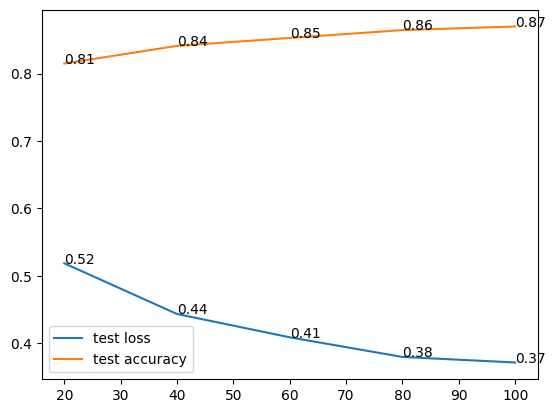

In [34]:
# plot test_losses and test_accuracies lists plot
plt.plot(epochs, test_losses, label='test loss')
plt.plot(epochs, test_accuracies, label='test accuracy')
# mark points 
for i, txt in enumerate(test_losses):
    plt.annotate(f'{round(txt, 2)}', (epochs[i], test_losses[i]))
for i, txt in enumerate(test_accuracies):
    plt.annotate(f'{round(txt, 2)}', (epochs[i], test_accuracies[i]))
plt.legend()

# final parameters
- Learning Rate: 0.0001
- Batch Size: 512
- Epochs: 20
